In [1]:
from numpy import newaxis
from ACSN import ACSN
from scipy.io import loadmat
from matplotlib import pyplot as plt

In [2]:
cmap = loadmat('../Python Test Images/cmap.mat')['blow']

In [3]:
type(cmap)

numpy.ndarray

In [4]:
cmap.shape

(64, 3)

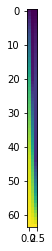

In [5]:
plt.imshow(cmap)

In [6]:
gain = loadmat('../Python Test Images/gain.mat')['gain']

In [7]:
gain.shape

(256, 256)

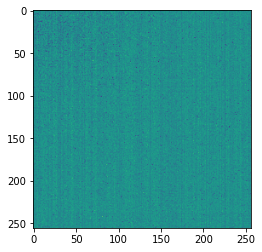

In [8]:
plt.imshow(gain)

In [9]:
offset = loadmat('../Python Test Images/offset.mat')['offset']

In [10]:
offset.shape

(256, 256)

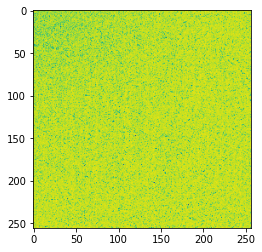

In [11]:
plt.imshow(offset)

In [12]:
from skimage import io
myimage = io.imread('../Python Test Images/TIRF_01_10ms.tif')

In [13]:
myimage.shape

(100, 256, 256)

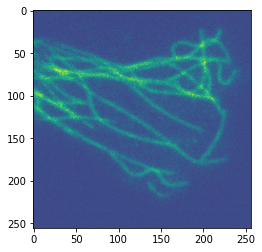

In [14]:
plt.imshow(myimage[50,:,:])

In [15]:
myimage0 = myimage[0]

In [24]:
myimage0.shape

(256, 256)

In [21]:
from numpy import newaxis
import numpy as np
myimage_fix = np.array(myimage0)[:, :, newaxis] # adding a third dimension
#myimage_fix = myimage0 #ACSN does not work if we do this, it needs the extra dimension even if it is only one in size

In [22]:
myimage_fix.shape

(256, 256, 1)

In [23]:
varargin = {"Weight": 0.2}

In [24]:
NA = 1.45
Lambda = .670
PixelSize = .065

In [25]:
#Process using ACSN
Qscore, sigma, img, SaveFileName = ACSN.ACSN(myimage_fix,NA,Lambda,PixelSize,varargin)

Doing normal processing: 
Elapsed Time: 0.9004942059982568 seconds

Average Quality: 
High: 0.7874786939835292



In [26]:
img.shape

(256, 256, 1)

In [27]:
img.dtype

dtype('float64')

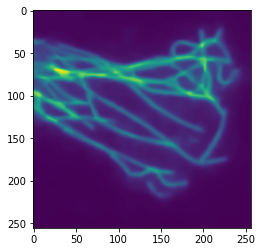

In [28]:
#Original image is a 3D volume. Only use the first image in the stack and ignores others
plt.imshow(img[:,:,0])

In [30]:
img_16bit = img.astype(np.int16)

In [32]:
#Save data
io.imsave('results/'+SaveFileName, img_16bit) #Saves the img

/home/ypu66991/.conda/envs/ACSNtest/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: results/ACSN_2021-07-23.tif is a low contrast image
  
